# Analysis on accuracy

In [2]:
%run ../oscilloscope/script/dataset.py

from keras import layers
from keras import models

DATASET_FOLDER = "../dataset/data_environment"
SAVED_MODEL = "../dataset/data_environment/my_life_environment_cnn_20190327133143.h5"

In [3]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False, shuffle=False)['mfsc']

model = models.load_model(SAVED_MODEL)
ds.class_labels

['silence',
 'train',
 'station',
 'fastfood',
 'escalator',
 'mall',
 'ship',
 'mall2']

In [4]:
train_data, train_labels = ds.reshape_per_class(train_data, train_labels)

'station'

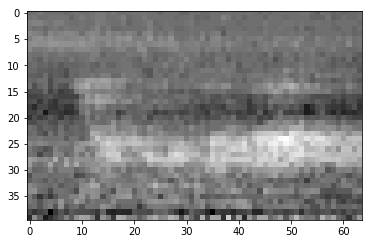

In [51]:
l = ds.class_labels.index('station')
image_number = 30

plt.imshow(np.rot90(train_data[l, image_number,:,:,0]), cmap='gray')
ds.class_labels[np.argmax(train_labels[l, image_number])]

In [52]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(train_data[l])

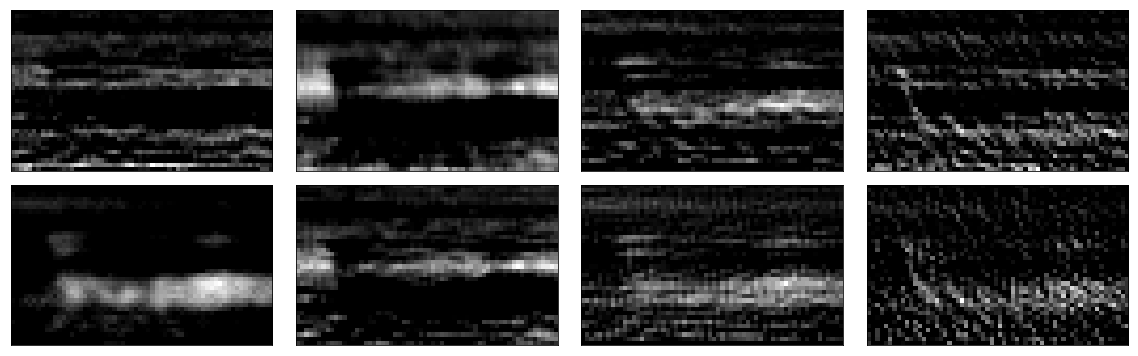

In [53]:
plot_layer(activations, image_number, 0, 4)

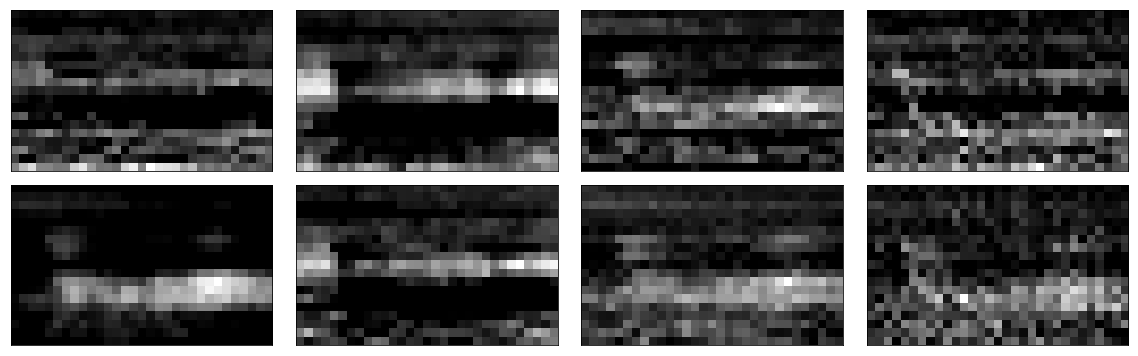

In [54]:
plot_layer(activations, image_number, 1, 4)

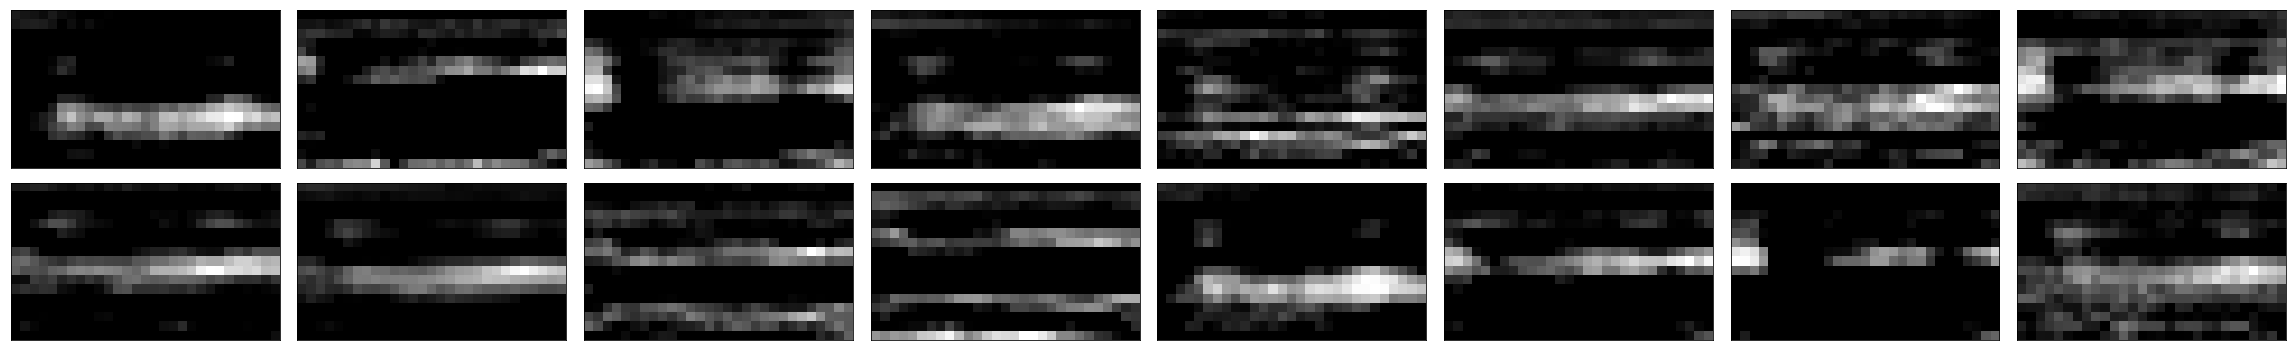

In [55]:
plot_layer(activations, image_number, 3, 8)

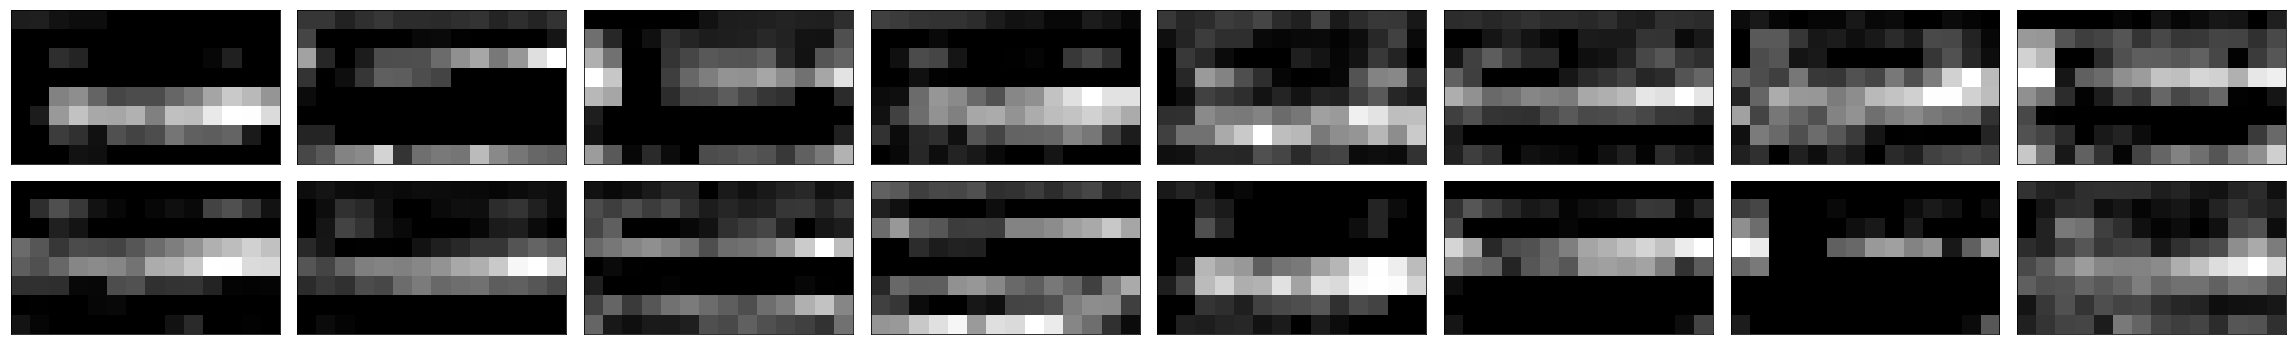

In [56]:
plot_layer(activations, image_number, 4, 8)

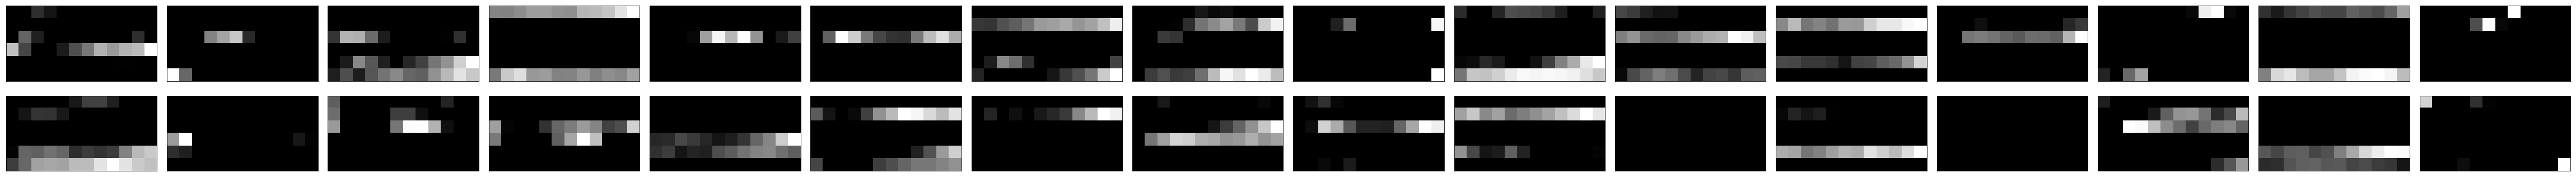

In [57]:
plot_layer(activations, image_number, 6, 16)

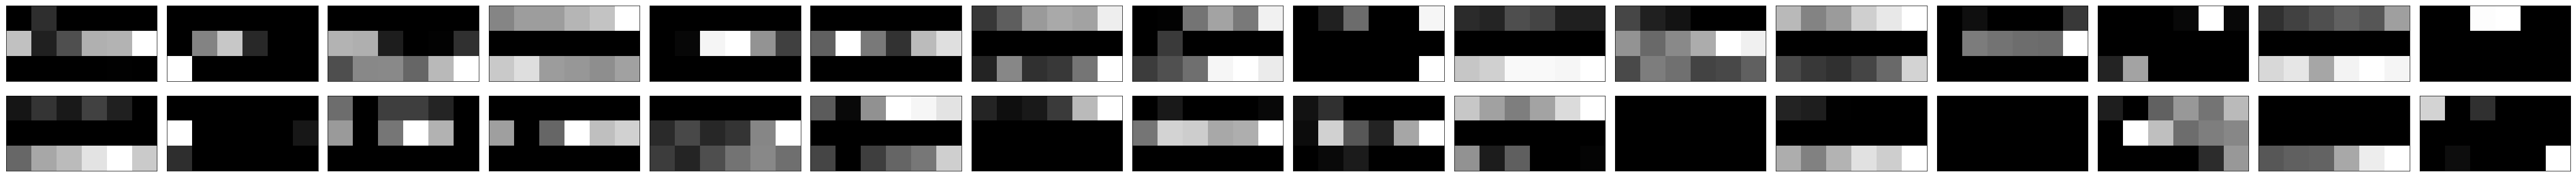

In [58]:
plot_layer(activations, image_number, 7, 16)

In [59]:
inference = (activations[-1]*100).astype(int)
index = np.array([np.argmax(l) for l in inference], dtype=int)
index

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
error = np.where(index != l)
error

(array([116, 117], dtype=int64),)

In [61]:
image_number = 117
ds.class_labels[index[image_number]]

'train'

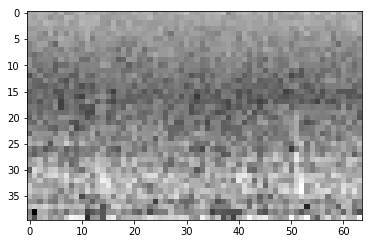

In [62]:
plt.imshow(np.rot90(train_data[l, image_number,:,:,0]), cmap='gray')